# Decision Tree


## *   Badal Parmar

# 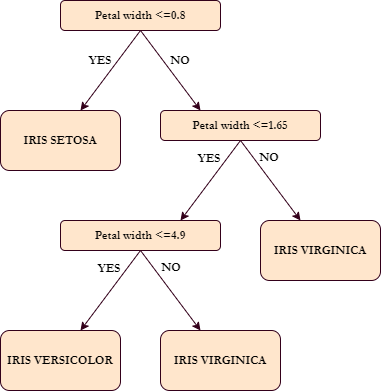


### **Above flow chart is prepared in draw.io for reference purpose**



# **Importing Required Libraries and Statements**

In [ ]:
import numpy as np
import pandas as pd
#!pip3 install --upgrade pandas

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

In [ ]:
%matplotlib inline
sns.set_style("darkgrid")

# **Loading and Preparing Data**
*  There were no missing values in dataset
*  The last columns in the Dataset is "Label" and is renamed as"L"

In [ ]:
df = pd.read_csv("Iris.csv")
df = df.drop("Id", axis=1)
df = df.rename(columns={"Species": "L"})

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,L
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


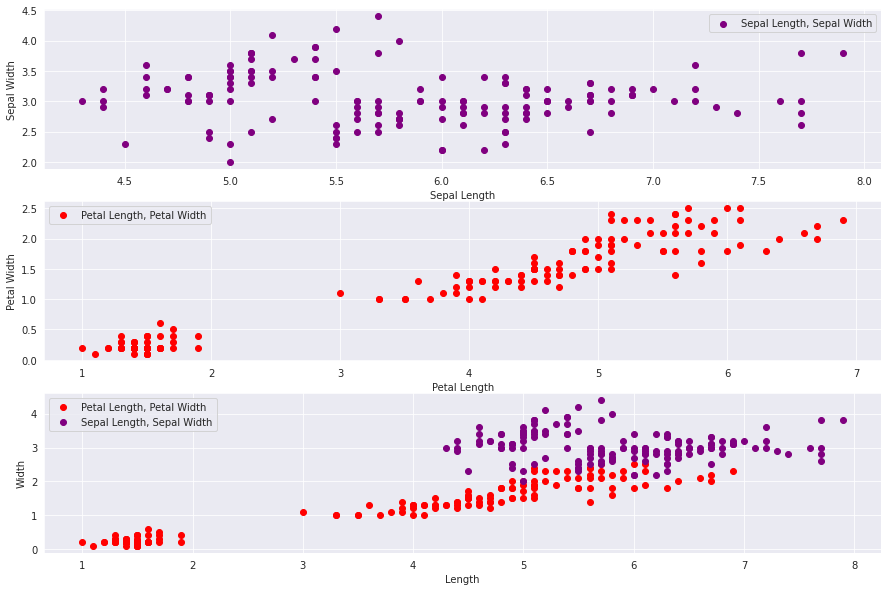

In [ ]:
plt.subplots(3, 1, figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c='purple', label='Sepal Length, Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Petal Length, Petal Width

plt.subplot(3, 1, 2)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c='red', label='Petal Length, Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# Sepal Length, Sepal Width and Petal Length, Petal Width

plt.subplot(3, 1, 3)
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c='red', label='Petal Length, Petal Width')
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c='purple', label='Sepal Length, Sepal Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.savefig('Plotting.png')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


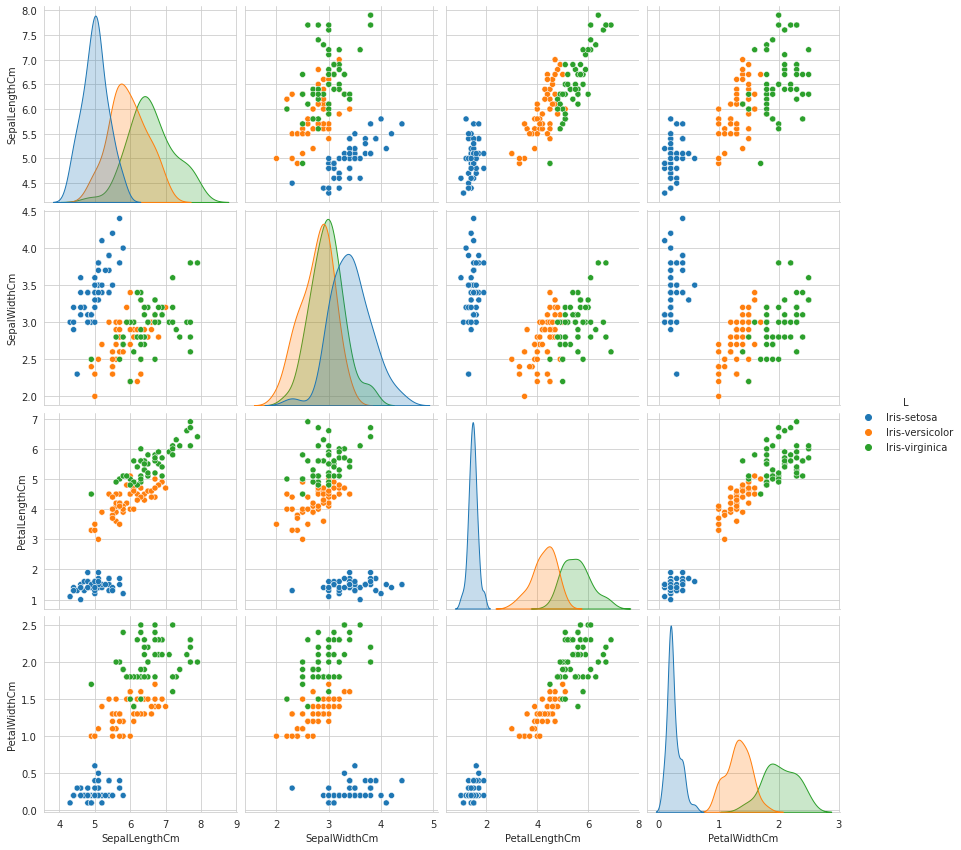

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='L',size=3)
plt.show()

# **Training, Testing and Split of Dataset**

In [ ]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [ ]:
random.seed(6)
train_df, test_df = train_test_split(df, test_size=10)

# **To check the Type of Dataset we're working with sample "data" is considered**

In [ ]:
data = train_df.values
data[:5]

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa']], dtype=object)

In [ ]:
def check_purity(data):
    
    L_column = data[:, -1]
    unique_classes = np.unique(L_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

# **Classification of Data**

In [ ]:
def classify_data(data):
    
    L_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(L_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

# **Getting the Potential Spilts**

In [ ]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):          # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        type_of_feature = FEATURE_TYPES[column_index]
        if type_of_feature == "continuous":
            potential_splits[column_index] = []
            for index in range(len(unique_values)):
                if index != 0:
                    current_value = unique_values[index]
                    previous_value = unique_values[index - 1]
                    potential_split = (current_value + previous_value) / 2

                    potential_splits[column_index].append(potential_split)
        
        # feature is categorical
        # (there need to be at least 2 unique values, otherwise in the
        # split_data function data_below would contain all data points
        # and data_above would be empty)
        elif len(unique_values) > 1:
            potential_splits[column_index] = unique_values
    
    return potential_splits


## **Spliting the Data**

In [ ]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

# **Calculating Lowest Overall Entropy**

In [ ]:
def calculate_entropy(data):
    
    L_column = data[:, -1]
    _, counts = np.unique(L_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

# **Calculating Overall Entropy**

In [ ]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [ ]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

# **Decision Tree Algorithms**

### **Representing the Decision Tree**

In [ ]:
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

In [ ]:
example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

# **Algorithms**

In [ ]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "L":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

In [ ]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

# **Final Classification**

In [ ]:
tree = decision_tree_algorithm(train_df, max_depth=3)
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.75': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


In [ ]:
sub_tree

{'question': ['yes_answer', 'no_answer']}

In [ ]:
example = test_df.iloc[2]
example

SepalLengthCm               6.7
SepalWidthCm                3.3
PetalLengthCm               5.7
PetalWidthCm                2.1
L                Iris-virginica
Name: 124, dtype: object

In [ ]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":  # feature is continuous
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [ ]:
classify_example(example, tree)

'Iris-virginica'

# **Calculating Final Accuracy**

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'L'], dtype='object')

In [ ]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df.classification == df.L
    
    accuracy = df.classification_correct.mean()
    
    return accuracy

In [ ]:
calculate_accuracy(test_df, tree)

1.0

In [ ]:
test_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,L,classification,classification_correct
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,True
20,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa,True
124,6.7,3.3,5.7,2.1,Iris-virginica,Iris-virginica,True
66,5.6,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor,True
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,True
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,True
37,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,True
120,6.9,3.2,5.7,2.3,Iris-virginica,Iris-virginica,True
95,5.7,3.0,4.2,1.2,Iris-versicolor,Iris-versicolor,True
81,5.5,2.4,3.7,1.0,Iris-versicolor,Iris-versicolor,True
